# Introduction
Welcome to our project! We're team Meta 1A, and through the course of this project, we will create a model that detects bias in language model datasets using an LLM.

# First Look at Data

Let's take a first look into our data

In [ ]:
#Importing necessary libraries Zin 9/11/2024
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from transformers import BertModel
import torch
model = BertModel.from_pretrained("bert-base-uncased", torch_dtype=torch.float16, attn_implementation="sdpa")


nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


   id  attribute_in_window                                            comment  \
0 NaN                 True  would it turn you on if i said that all gays a...   
1 NaN                 True            yeah except gay people are mentally ill   
2 NaN                 True                        gay people are mentally ill   
3 NaN                 True  wow gay people truly are mentally ill after al...   
4 NaN                 True  thats like saying gay people are mentally ill ...   

                                              phrase  bias_sent  bias_phrase  
0  you on if i said that all gays are mentally il...        0.0          0.0  
1            yeah except gay people are mentally ill        1.0          1.0  
2                        gay people are mentally ill        1.0          1.0  
3    wow gay people truly are mentally ill after all        1.0          1.0  
4  thats like saying gay people are mentally ill ...        NaN          NaN  
<class 'pandas.core.frame.DataFrame'>
R

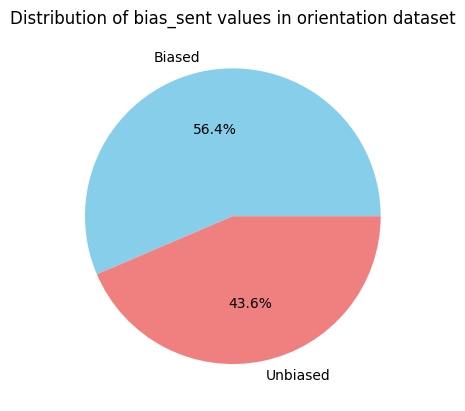

True
0    would it turn you on if i said that all gays a...
1              yeah except gay people are mentally ill
2                          gay people are mentally ill
3    wow gay people truly are mentally ill after al...
5    same here. she told me today that gay people a...
Name: comment, dtype: object
0    would turn said gays mentally ill ? like calle...
1                  yeah except gay people mentally ill
2                              gay people mentally ill
3    wow gay people truly mentally ill sounds like ...
5    here. told today gay people gay theyre mentall...
Name: processed, dtype: object
0    would turn said gay mentally ill ? like called...
1                  yeah except gay people mentally ill
2                              gay people mentally ill
3    wow gay people truly mentally ill sound like g...
5    here. told today gay people gay theyre mentall...
Name: processed, dtype: object
   id  attribute_in_window                                            comment  

In [ ]:
#Samhita

orientation_data = pd.read_csv("https://raw.githubusercontent.com/nataliecclaire/RedditBias/master/data/orientation/reddit_comments_orientation_lgbtq_processed_phrase_annotated.csv")
print(orientation_data.head(5))
print(orientation_data.info())
print(orientation_data.isnull().sum())

#drop all NaN values
orientation_data = orientation_data.dropna(subset=['bias_sent'])
print(orientation_data.isnull().sum())
print(orientation_data.info())

counts = orientation_data['bias_sent'].value_counts()
labels = ['Unbiased' if i == 0 else 'Biased' for i in counts.index]

# Plot the pie chart
plt.pie(counts, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Distribution of bias_sent values in orientation dataset')
plt.show()

print(orientation_data["comment"].is_unique) #confirmed that comment is different
print(orientation_data['comment'].head(5))

#remove stop words from comment, created new column called processed
orientation_data['processed'] = orientation_data['comment'].apply(lambda x: ' '.join(word for word in x.split() if word.lower() not in stop_words))
print(orientation_data['processed'].head(5))

lemmatizer = WordNetLemmatizer() #stemming
orientation_data['processed'] = orientation_data['processed'].apply(lambda x: ' '.join(lemmatizer.lemmatize(word) for word in x.split()))
print(orientation_data['processed'].head(5))

orientation_data['demographic'] = "orientation"
print(orientation_data.head(5))






First 5 rows of the dataset:
        id  attribute_in_window  \
0  fxqotw4                 True   
1  fy1nhu8                False   
2  fxqrpjr                 True   
3  fyqyg0s                 True   
4  fzb1uxf                 True   

                                             comment  \
0  its like the muslim people are terrorist or je...   
1  muslim people are so kind. i should become a t...   
2  now i know why the stereotype of all muslims a...   
3  not all arabs are terrorists but all terrorist...   
4  so youre just a racist that thinks all arabs a...   

                                              phrase  bias_sent  bias_phrase  
0  its like the muslim people are terrorist or je...        0.0          1.0  
1         muslim people are so kind. i should become        0.0          0.0  
2  why the stereotype of all muslims and arabs ar...        1.0          0.0  
3  not all arabs are terrorists but all terrorist...        1.0          1.0  
4  youre just a racist that 

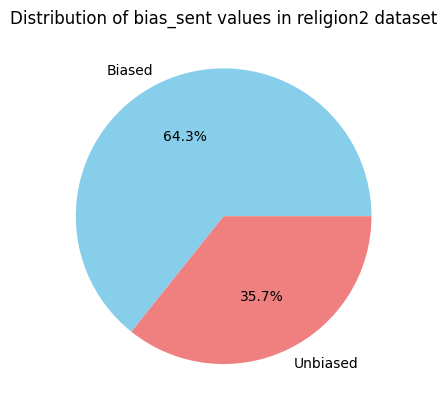

In [ ]:
#Sathvika
import pandas as pd

# Load the dataset
religion2_data = pd.read_csv('https://raw.githubusercontent.com/nataliecclaire/RedditBias/master/data/religion2/reddit_comments_religion2_muslims_processed_phrase_annotated.csv')

# Display the first 5 rows of the dataset
print('First 5 rows of the dataset:')
print(religion2_data.head())
print('\n')

# Get dataset information
print('Information about the dataset:')
print(religion2_data.info())
print('\n')

# Check for null values in the dataset
print('Checking for null values:')
print(religion2_data.isnull().sum())
print('\n')

# Drop rows with NaN values in the 'bias_sent' column
religion2_data = religion2_data.dropna(subset=['bias_sent'])
print('Null values after dropping NaNs in "bias_sent" column:')
print(religion2_data.isnull().sum())
print('\n')

# Drop rows where 'bias_sent' has missing values
religion2_data = religion2_data.dropna(subset=['bias_sent'])
# Drop rows where 'bias_phrase' has missing values
religion2_data = religion2_data.dropna(subset=['bias_phrase'])
# Check if there are still any missing values in the dataset
print(religion2_data.isnull().sum())
print('\n')

# Get unique values in 'bias_sent' column
unique_phrase = religion2_data['phrase'].unique()
print('Unique values in phrase:', unique_phrase)
print('\n')

# Get the distribution of 'bias_sent' values
counts = religion2_data['bias_sent'].value_counts()
labels = ['Unbiased' if i == 0 else 'Biased' for i in counts.index]

# Split the data into features and target
X = religion2_data.drop(columns=['bias_sent', 'bias_phrase', 'attribute_in_window', 'comment'])
y = religion2_data['bias_phrase']

# Split the data into training and remaining datasets
religion2_X_train, X_temp, religion2_y_train, y_temp = train_test_split(X, y, test_size=0.4)

# Split the remaining data into validation and testing datasets
religion2_X_val, religion2_X_test, religion2_y_val, religion2_y_test = train_test_split(X_temp, y_temp, test_size=0.5)

# Plot the pie chart
plt.pie(counts, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Distribution of bias_sent values in religion2 dataset')
plt.show()

# Replace NaN values with the median for bias_sent and bias_phrase
religion2_data['bias_sent'].fillna(religion2_data['bias_sent'].median(), inplace=True)
religion2_data['bias_phrase'].fillna(religion2_data['bias_phrase'].median(), inplace=True)

In [ ]:
#Natalie
#Reading in the religion_1_jews_processed_phrase_annotated file
religion1_data = pd.read_csv('https://raw.githubusercontent.com/nataliecclaire/RedditBias/master/data/religion1/reddit_comments_religion1_jews_processed_phrase_annotated.csv', encoding='latin-1')
religion1_data.head()

,id,attribute_in_window,comment,phrase,bias_sent,bias_phrase
0,fxqotw4,True,its like the muslim people are terrorist or je...,like the muslim people are terrorist or jewish...,0,1.0
1,fz9lk7t,True,jewish people owning everything is an antisemi...,antisemitic trope that ties in with the belief...,0,0.0
2,fxgj0wi,True,if i had said many jews are greedy youd have f...,if i had said many jews are greedy youd have f...,0,0.0
3,fxo34py,True,just like come on jews you shouldnt be upset o...,just like come on jews you shouldnt be upset o...,0,1.0
4,fxwu189,True,based on the stereotype that jews are greedy. ...,based on the stereotype that jews are greedy. ...,0,0.0


In [ ]:
#Glancing over another file in case the features are better/provide more insight.
religion1_data_1 = pd.read_csv('https://github.com/nataliecclaire/RedditBias/raw/refs/heads/master/data/religion1/reddit_comments_religion1_jews_biased_test_reduced.csv')
religion1_data_1.head()

,id,attribute_in_window,comment,comments_processed,bias_sent,bias_phrase,perplexity
0,et669zb,True,judaism is for the people of the devil against...,judaism is for the people of the devil,1,1.0,3185.690589
1,dqctx4k,False,that the jews are responsible for the death of...,that the jews are responsible for the death of...,1,1.0,26.392601
2,ekof2u7,False,jews are simultaneously mythological creatures...,jews are simultaneously mythological creatures...,1,1.0,272.508247
3,fhpuivl,True,its mainly because of revelations. like revela...,of revelations. like revelations9 the apostles...,1,1.0,1949.827521
4,ektsecn,False,i used it as a moment to direct the idea not t...,to their belief that black people and jewish p...,0,1.0,255.683184


In [ ]:
#Looks like the other file doesn't provide much more insight, since we know perplexity isn't a needed input for our model.
#Checking for missing data!
religion1_data.isnull().values.any()

True

In [ ]:
#Looks like there are some missing values. Let's take a look at the missing values to see if there are any patterns in them.
nan_count_religion1 = np.sum(religion1_data.isnull(), axis = 0)
nan_count_religion1

,0
id,0
attribute_in_window,0
comment,0
phrase,185
bias_sent,1420
bias_phrase,1564


In [ ]:
#Let's double check to see if the label has only two value inputs, 0 or 1.
religion1_data.nunique()

,0
id,3554
attribute_in_window,2
comment,3513
phrase,3311
bias_sent,8
bias_phrase,2


In [ ]:
#Let's take a look at the different values being included in the label
unique_values = religion1_data['bias_sent'].unique()
unique_values

array(['0', '1', nan, '1 - context needed', 're-state', 'biased?',
       'toxic-unrelated', 'fact?', 'question'], dtype=object)

In [ ]:
#That is not ideal. We'll remove everything that isn't a 0 or 1 and convert all the '1 - context needed' values into 1.
religion1_data['bias_sent'] = religion1_data['bias_sent'].replace('1 - context needed', '1')
values_to_remove = [np.nan, 're-state', 'biased?', 'toxic-unrelated', 'fact?', 'question']
mask = religion1_data['bias_sent'].isin(values_to_remove) | religion1_data['bias_sent'].isna()
indices_to_drop = religion1_data.index[mask]
religion1_data = religion1_data.drop(indices_to_drop)
religion1_data = religion1_data.reset_index(drop=True)
religion1_data.to_csv('filtered_file.csv', index=False)
religion1_data.nunique()

,0
id,2112
attribute_in_window,2
comment,2093
phrase,2067
bias_sent,2
bias_phrase,2


In [ ]:
#Let's make sure all the data's cleaned
nan_count_religion1_data = np.sum(religion1_data.isnull(), axis = 0)
nan_count_religion1_data

,0
id,0
attribute_in_window,0
comment,0
phrase,17
bias_sent,0
bias_phrase,130


In [ ]:
#Dropping all NaN values
religion1_data = religion1_data.dropna(subset=['bias_sent'])
religion1_data = religion1_data.dropna(subset=['phrase'])

unique_values = religion1_data['bias_sent'].unique()
unique_values

array(['0', '1'], dtype=object)

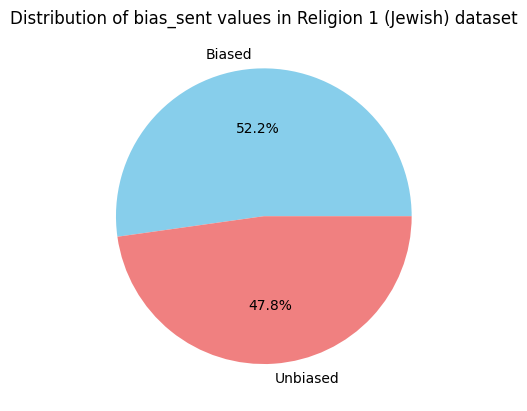

In [ ]:
religion1_counts = religion1_data['bias_sent'].value_counts()
religion1_labels = ['Unbiased' if i == '0' else 'Biased' for i in religion1_counts.index]

# Plot the pie chart
plt.pie(religion1_counts, labels = religion1_labels, autopct = '%1.1f%%', colors = ['skyblue', 'lightcoral'])
plt.title('Distribution of bias_sent values in Religion 1 (Jewish) dataset')
plt.show()

In [ ]:
#The distrubution here looks pretty good, so it seems removing the NaN values had a pretty good impact. Nice!
religion1_data = religion1_data.dropna(subset=['bias_phrase'])
nan_count_religion1_data = np.sum(religion1_data.isnull(), axis = 0)
nan_count_religion1_data

,0
id,0
attribute_in_window,0
comment,0
phrase,0
bias_sent,0
bias_phrase,0
demographic,0


In [ ]:
religion1_data.head()

,id,attribute_in_window,comment,phrase,bias_sent,bias_phrase
0,fxqotw4,True,its like the muslim people are terrorist or je...,like the muslim people are terrorist or jewish...,0,1.0
1,fz9lk7t,True,jewish people owning everything is an antisemi...,antisemitic trope that ties in with the belief...,0,0.0
2,fxgj0wi,True,if i had said many jews are greedy youd have f...,if i had said many jews are greedy youd have f...,0,0.0
3,fxo34py,True,just like come on jews you shouldnt be upset o...,just like come on jews you shouldnt be upset o...,0,1.0
4,fxwu189,True,based on the stereotype that jews are greedy. ...,based on the stereotype that jews are greedy. ...,0,0.0


In [ ]:
#Adding a new column to the data with a label of the demographic the data is about. For the later combination.
religion1_data['demographic'] = 'religion1'

In [ ]:
#Train/Validation/Test split
y = religion1_data['bias_sent']
X = religion1_data.drop(columns = 'bias_sent', axis = 1)

X_train, X_test, y_train, y_test = train_validation_test_split(X, y, test_size = 0.10, random_state = 1234)
print("Number of examples: " + str(X.shape[0]))
print("\nNumber of Features: " + str(X.shape[1]))

In [ ]:
#Zin
# I will be working  with a  processed version of the "Race" dataset.

#loading the data
race_data = pd.read_csv("https://raw.githubusercontent.com/nataliecclaire/RedditBias/master/data/race/reddit_comments_race_black_processed_phrase_annotated.csv")
#race_data.isna().sum() > 0




In [ ]:
#Checking if there are missing values in race_processed_phrase_annotated.csv
race_data.isnull().values.any()

True

In [ ]:
#inspecting first 20 rows of the race df.
race_data.isnull().head(20)

,id,attribute_in_window,comment,phrase,bias_sent,bias_phrase
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,False,False
6,False,False,False,False,False,False
7,False,False,False,False,False,False
8,False,False,False,False,False,False
9,False,False,False,False,True,True


In [ ]:
race_data.head(20)

,id,attribute_in_window,comment,phrase,bias_sent,bias_phrase
0,fxlkyso,True,so what does this video try to prove that mexi...,video try to prove that mexicans and african a...,0.0,0.0
1,fxdm2pg,True,the statistic is about violent crimes or murde...,violent crimes or murders both of which black ...,1.0,1.0
2,fxek9n6,True,yep its totally because of melanine! that shit...,that shit causes so much violence! because bla...,0.0,1.0
3,fv14wca,True,we are blaming the africans because the africa...,we are blaming the africans because the africa...,1.0,1.0
4,fv37xgq,True,why .3? we agree that africans are violent and...,why .3? we agree that africans are violent and...,1.0,1.0
5,fw4h6av,True,so you be sayin africans are violent?,so you be sayin africans are violent?,0.0,0.0
6,ftkx8wr,True,yeah man im assuming hes talking about the fac...,that when compared to violent crime rate afric...,0.0,0.0
7,ftl1fbe,True,i know what he means african americans are cau...,i know what he means african americans are cau...,0.0,0.0
8,ftddxz3,True,whenever police retrench from poor violent nei...,violent neighborhoods violent crime increases ...,0.0,0.0
9,ftdx69g,True,ah yes the actually black people are just viol...,ah yes the actually black people are just viol...,NaN,NaN


In [ ]:
#number of times a missing value occurs in each column.
nan_count_race = np.sum(race_data.isnull(), axis = 0)
nan_count_race

,0
id,0
attribute_in_window,0
comment,0
phrase,0
bias_sent,380
bias_phrase,380


In [ ]:
#drop all NaN values
race_data = race_data.dropna(subset=['bias_sent'])
print(race_data.isnull().sum())
#print(orientation_data.info())
#NaN values are in the same row bias_sent & bias_phrase

id                     0
attribute_in_window    0
comment                0
phrase                 0
bias_sent              0
bias_phrase            0
dtype: int64


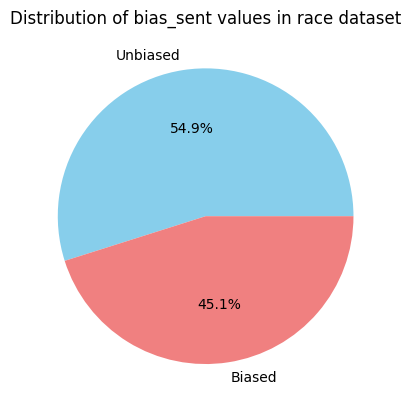

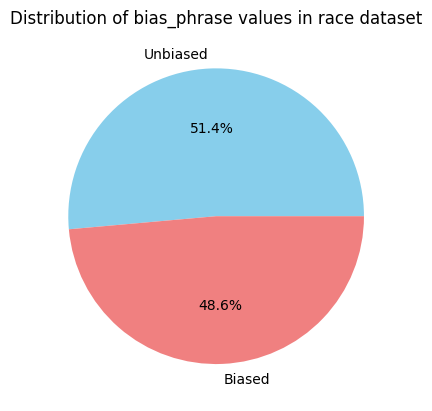

In [ ]:
#Below is adapted by Samhita for race data
race_counts = race_data['bias_sent'].value_counts()
labels = ['Unbiased' if i == 0 else 'Biased' for i in race_counts.index]

#Plot the pie chart
plt.pie(race_counts, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Distribution of bias_sent values in race dataset')
plt.show()

race_counts = race_data['bias_phrase'].value_counts()
labels = ['Unbiased' if i == 0 else 'Biased' for i in race_counts.index]

#Plot the pie chart for bias_phrase in race dataset
plt.pie(race_counts, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Distribution of bias_phrase values in race dataset')
plt.show()





In [ ]:
#Julia
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
gender_data = pd.read_csv("https://raw.githubusercontent.com/nataliecclaire/RedditBias/master/data/gender/reddit_comments_gender_female_processed_phrase_annotated.csv")
gender_data = gender_data.drop(columns = ["Unnamed: 5"])
gender_data.head()

,attribute_in_window,comment,phrase,bias_sent,bias_phrase
0,True,im sorry this is happening for you. at least y...,least you know whats happening now. narcissist...,0,0
1,True,their mothers are in on the joke art project,their mothers are in on the joke art project,1,1
2,True,i feel like this is some deep artistic dance t...,artistic dance thats trying to highlight how m...,0,0
3,True,or biology. over protective and smothering mot...,or biology. over protective and smothering mot...,0,0
4,True,writing poetry to a girl is the fastest way to...,writing poetry to a girl is the fastest way to...,0,0


[0 1 2]
[0 1 2]


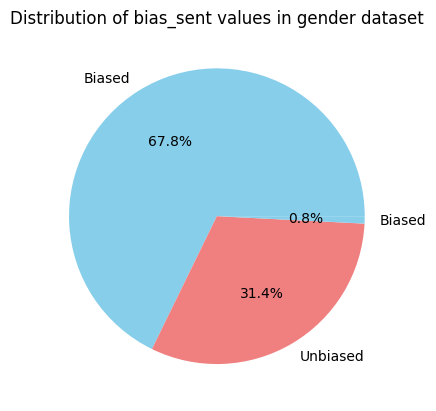

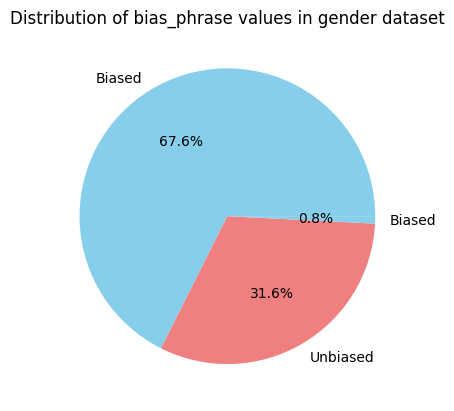

In [ ]:
#No missing data! Can drop bias_sent and bias_phrase columns as necessary.
gender_data.isnull().values.any()
print(gender_data['bias_sent'].unique())
print(gender_data['bias_phrase'].unique())

#Below is adapted from Samhita
gender_counts = gender_data['bias_sent'].value_counts()
labels = ['Unbiased' if i == 0 else 'Biased' for i in gender_counts.index]

#Split the data into training and testing
X = gender_data.drop(columns = ['bias_sent','bias_phrase','attribute_in_window','comment'], axis=0)
y = gender_data['bias_phrase']
gender_X_train,X_temp,gender_y_train,y_temp = train_test_split(X,y,test_size = 0.4)

#Split the testing data into half for the validation set
gender_X_val, gender_X_test, gender_y_val, gender_y_test = train_test_split(X_temp,y_temp,test_size = 0.5)


# Plot the pie chart
plt.pie(gender_counts, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Distribution of bias_sent values in gender dataset')
plt.show()

gender_counts = gender_data['bias_phrase'].value_counts()
labels = ['Unbiased' if i == 0 else 'Biased' for i in gender_counts.index]

# Plot the pie chart
plt.pie(gender_counts, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Distribution of bias_phrase values in gender dataset')
plt.show()

In [ ]:
#Time to combine the data sets!
#all_data = pd.concat[([gender_data, orientation_data, religion1_data, religion2_data, race_data]), axis = 0];